In [12]:
import xlrd

sheet = xlrd.open_workbook('parking_tickets_readme.xls').sheet_by_index(0)
for row in range(0,sheet.nrows):
    print(sheet.row(row))

[text:'PARKING TICKET DATA', empty:'']
[empty:'', empty:'']
[text:'ITEM NAME', text:'DESCRIPTION']
[empty:'', empty:'']
[text:'TAG_NUMBER_MASKED', text:'First three (3) characters masked with asterisks']
[text:'DATE_OF_INFRACTION', text:'Date the infraction occurred in YYYYMMDD format']
[text:'INFRACTION_CODE', text:'Applicable Infraction code (numeric)']
[text:'INFRACTION_DESCRIPTION', text:'Short description of the infraction']
[text:'SET_FINE_AMOUNT', text:'Amount of set fine applicable (in dollars)']
[text:'TIME_OF_INFRACTION', text:'Time the infraction occurred  in HHMM format (24-hr clock)']
[text:'LOCATION1', text:'Code to denote proximity (see table below)']
[text:'LOCATION2', text:'Street address']
[text:'LOCATION3', text:'Code to denote proximity (optional)']
[text:'LOCATION4', text:'Street address (optional)']
[text:'PROVINCE', text:'Province or state code of vehicle licence plate']
[empty:'', empty:'']
[empty:'', empty:'']
[text:'Proximity Code Table', empty:'']
[text:'PROX

Items to store in memory:
    -infraction_codes counters for all years
    -fine_amounts for all years
    -top locations for all years (numbers scrubbed)
    -number of tickets per day for all years (graph and raw data)

Predict 2016 parking tickets??!?!?!?
biases in the way tickets are allocated
elections - mayor and riding
between district lines
what are the reason that numbers could vary by space and time?
reduce resolution to see how many unique values remain


In [17]:
import csv
import re
years=['2008','2009','2010','2011','2012','2013','2014','2015']
files_to_open=['data/'+year+'.csv' for year in years]

def test_files(years, files_to_open):
    for file in files_to_open:
        try:
            with open(file,'rt',encoding='utf8') as f:
                reader = csv.DictReader(f)
                line = next(reader)
                print(collapse_address(line['location2']))
                print(file+" success")
        except FileNotFoundError:
            print(file+" failed")
            
test_files(years,files_to_open)

EAST MALL
data/2008.csv success
PRINCES BLVD
data/2009.csv success
DUPONT ST
data/2010.csv success
BRIAN HARRISON WAY
data/2011.csv success
PARKSIDE DR
data/2012.csv success
DANFORTH AVE
data/2013.csv success
SELLERS AVE
data/2014.csv success
CENTRE AVE
data/2015.csv success


In [15]:
import csv
import sys
from collections import defaultdict
from collections import Counter
import re
import copy

def collapse_to_street(address):
    return re.sub("^\d+\s|\s\d+\s|\s\d+$", "", address)

def collapse_to_hundred(address):
    numbers_in_address = [int(s) for s in str.split() if s.isdigit()]

infraction_codes_dict={}
fine_amounts_dict={}
addresses_dict={}
#dates = defaultdict(int)
csv.field_size_limit(sys.maxsize)
years=['2008','2009','2010','2011','2012','2013','2014','2015']
files_to_open=['data/'+year+'.csv' for year in years]
for idx,file in enumerate(files_to_open):
    #infraction_codes = defaultdict(int)
    #fine_amounts = defaultdict(int)
    addresses = defaultdict(list)
    with open(file, 'rt', encoding='utf8') as f:
        reader = csv.DictReader(f)
        for line in reader:
            #infraction_codes[line['infraction_code']]+=1
            #fine_amounts[line['set_fine_amount']]+=1
            addresses[collapse_address(line['location2'])]+=1
            #dates[line['date_of_infraction']]+=1
    #infraction_codes_dict[years[idx]]=copy.deepcopy(infraction_codes)
    #fine_amounts_dict[years[idx]]=copy.deepcopy(fine_amounts)
    addresses_dict[years[idx]]=copy.deepcopy(addresses)
    #infraction_codes.clear()
    #fine_amounts.clear()
    addresses.clear()
    print("PROCESSED "+years[idx])

PROCESSED 2008
PROCESSED 2009
PROCESSED 2010
PROCESSED 2011
PROCESSED 2012
PROCESSED 2013
PROCESSED 2014
PROCESSED 2015


In [16]:
print(addresses['2010'])

[]


In [8]:
import pickle
#pickle.dump(dates,open("dates.pkl","wb"))
pickle.dump(infraction_codes_dict,open("infraction_codes.pkl","wb"))
pickle.dump(fine_amounts_dict,open("fine_amounts.pkl","wb"))
pickle.dump(addresses_dict,open("addresses.pkl","wb"))

In [17]:
#testing address resolution: number of addresses with no street number
#api rate limit = 2500 free requests per day
#fuck google
keyset = set()
for key in addresses_dict.keys():
    keyset.update(addresses_dict[key].keys())
print(len(keyset))

55230


In [1]:
import csv
import sys
from collections import defaultdict
import re

#testing address resolution
def myround(x, base=100):
    return int(base * round(float(x)/base))

def get_number(address):
    numbers_in_address = [int(s) for s in address.split() if s.isdigit()]
    if numbers_in_address:
        return numbers_in_address[0]
    else:
        return None

def collapse_to_street(address):
    return re.sub("^\d+\s|\s\d+\s|\s\d+$", "", address)

csv.field_size_limit(sys.maxsize)
years=['2008','2009','2010','2011','2012','2013','2014','2015']
files_to_open=['data/'+year+'.csv' for year in years]
addresses100 = defaultdict(set)
for idx,file in enumerate(files_to_open):
    with open(file, 'rt', encoding='utf8') as f:
        reader = csv.DictReader(f)
        for line in reader:
            address = get_number(line['location2'])
            if address:
                addresses100[collapse_to_street(line['location2'])].add(myround(address))
    print("PROCESSED "+file)

PROCESSED data/2008.csv
PROCESSED data/2009.csv
PROCESSED data/2010.csv
PROCESSED data/2011.csv
PROCESSED data/2012.csv
PROCESSED data/2013.csv
PROCESSED data/2014.csv
PROCESSED data/2015.csv


In [15]:
#ADDRESSES VARIABLE = DICT OF SETS OF ADDRESSES UNROUNDED!
count=0
for key in addresses.keys():
    address_count = len(addresses[key])
    if address_count > 1000:
        print(key,address_count)
    count+=address_count
print(count)

DOVERCOURT RD 1118
DUFFERIN ST 1479
BLOOR ST W 2787
YONGE ST 4049
KINGSTON RD 1467
GERRARD ST E 1805
BATHURST ST 1525
QUEEN ST E 2285
WESTON RD 1423
LAKE SHORE BLVD W 1424
DAVENPORT RD 1236
KING ST W 1303
JANE ST 1033
DUNDAS ST W 3003
EGLINTON AVE W 1855
COLLEGE ST 1366
QUEEN ST W 1775
ST CLAIR AVE W 1768
LANSDOWNE AVE 1039
DANFORTH AVE 2624
553931


In [18]:
#ADDRESSES50 VARIABLE = DICT OF SETS OF ADDRESSES ROUNDED TO NEAREST 50!
count=0
for key in addresses50.keys():
    address_count = len(addresses50[key])
    if address_count > 100:
        print(key,address_count)
    count+=address_count
print(count)

DUFFERIN ST 118
BLOOR ST W 179
YONGE ST 218
KINGSTON RD 133
BATHURST ST 130
QUEEN ST E 135
WESTON RD 116
JANE ST 107
KEELE ST 104
DUNDAS ST W 165
EGLINTON AVE W 123
SHEPPARD AVE E 140
COLLEGE ST 108
QUEEN ST W 113
DANFORTH AVE 140
LAWRENCE AVE E 119
87991


In [3]:
#ADDRESSES100 VARIABLE = DICT OF SETS OF ADDRESSES ROUNDED TO 100!
count=0
for key in addresses100.keys():
    address_count = len(addresses100[key])
    if address_count > 100:
        print(key,address_count)
    count+=address_count
print(count)

DUNDAS ST W 112
BLOOR ST W 127
YONGE ST 146
70550


In [43]:
import pickle
dates = pickle.load(open("dates.pkl","rb"))

defaultdict(<class 'int'>, {'20080717': 8251, '20130919': 8046, '20110920': 7829, '20110515': 5821, '20080505': 9220, '20080317': 8854, '20130203': 6048, '20100115': 8426, '20081003': 9472, '20100723': 8169, '20090720': 7127, '20121025': 8274, '20100103': 3843, '20141023': 8095, '20150517': 4148, '20110104': 7177, '20100315': 8848, '20100530': 6649, '20130920': 7760, '20140224': 7966, '20140721': 6732, '20121120': 8845, '20111011': 7596, '20140127': 5268, '20121121': 8601, '20090401': 8748, '20151230': 6301, '20150726': 4848, '20110824': 8437, '20130805': 3246, '20130204': 7313, '20150801': 5545, '20110527': 8677, '20120826': 5111, '20121001': 9081, '20081226': 2027, '20110106': 7499, '20080610': 9155, '20150405': 2263, '20131105': 8776, '20130430': 8680, '20080516': 10232, '20140522': 7148, '20090108': 7778, '20150705': 4956, '20081014': 8336, '20130527': 8019, '20120708': 6106, '20091122': 5762, '20120720': 8126, '20080716': 9420, '20150110': 5969, '20101117': 8009, '20100701': 4083,

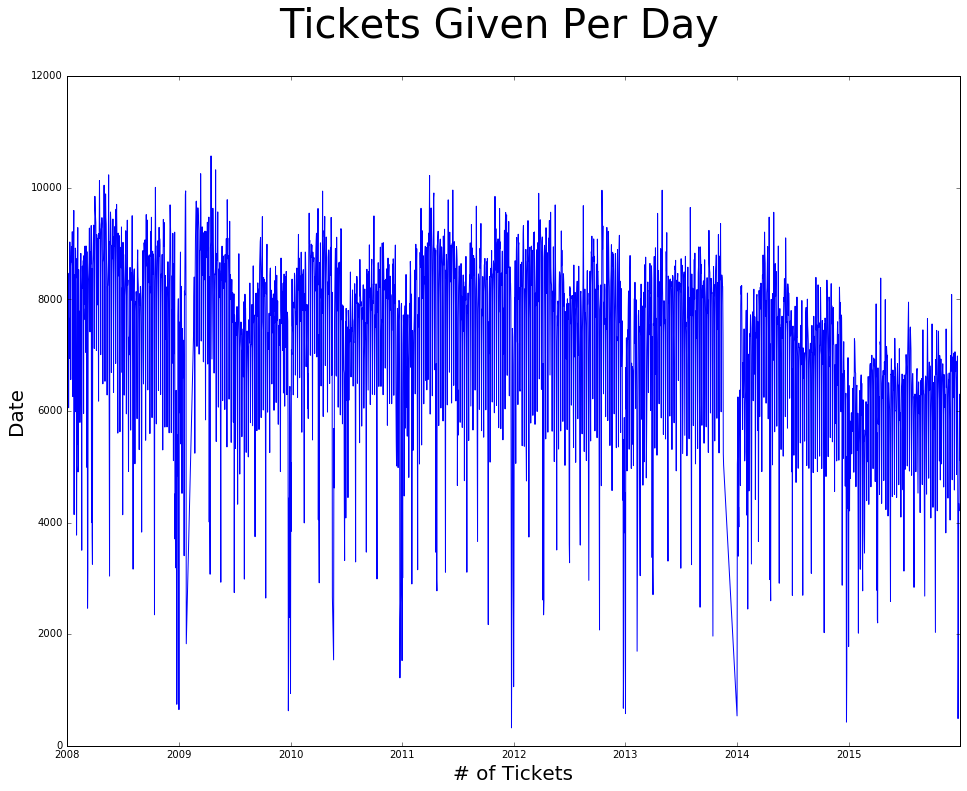

In [38]:
#Plot number of tickets per day
%matplotlib inline

import matplotlib.pyplot as plt
from sortedcontainers import SortedDict
import datetime as dt

sorted_dates = SortedDict(dict(dates))
del sorted_dates['date_of_infraction']
#print(sorted_dates)
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in sorted_dates.keys()]
fig = plt.figure(figsize=(16,12))
fig.suptitle('Tickets Given Per Day', fontsize=40)
plt.xlabel('# of Tickets', fontsize=20)
plt.ylabel('Date', fontsize=20)
plt.plot(x,sorted_dates.values())
plt.show()